# Credit Score Predicter

## The Data

Data obtained from kaggle: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

### Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

| Column name              	| Description                                                         	|
|--------------------------	|---------------------------------------------------------------------	|
| ID                       	| Represents a unique identification of an entry                      	|
| Customer_ID              	| Customer_ID                                                         	|
| Month                    	| Represents the month of the year                                    	|
| Name                     	| Represents the name of a person                                     	|
| Age                      	| Represents the age of the person                                    	|
| SSN                      	| Represents the social security number of a person                   	|
| Occupation               	| Represents the occupation of the person                             	|
| Annual_Income            	| Represents the annual income of the person                          	|
| Monthly_Inhand_Salary    	| Represents the monthly base salary of a person                      	|
| Num_Bank_Accounts        	| Represents the number of bank accounts a person holds               	|
| Interest_Rate          	| Represents the number of other credit cards held by a person        	|
| Interest_Rate            	| Represents the interest rate on credit card                         	|
| Num_of_Loan              	| Represents the number of loans taken from the bank                  	|
| Type_of_Loan             	| Represents the types of loan taken by a person                      	|
| Delay_from_due_date      	| Represents the average number of days delayed from the payment date 	|
| Num_of_Delayed_Payment   	| Represents the average number of payments delayed by a person       	|
| Changed_Credit_Limit     	| Represents the percentage change in credit card limit               	|
| Num_Credit_Inquiries     	| Represents the number of credit card inquiries                      	|
| Credit_Mix               	| Represents the classification of the mix of credits                 	|
| Outstanding_Debt         	| Represents the remaining debt to be paid (in USD)                   	|
| Credit_Utilization_Ratio 	| Represents the utilization ratio of credit card                     	|
| Credit_History_Age       	| Represents the age of credit history of the person                  	|
| Payment_of_Min_Amount    	| Represents whether only the minimum amount was paid by the person   	|
| Total_EMI_per_month      	| Represents the monthly EMI payments (in USD)                        	|
| Amount_invested_monthly  	| Represents the monthly amount invested by the customer (in USD)     	|
| Payment_Behaviour        	| Represents the payment behavior of the customer (in USD)            	|
| Monthly_Balance          	| Represents the monthly balance amount of the customer (in USD)      	|
| Credit_Score             	| Represents the bracket of credit score (Poor, Standard, Good)       	|

## Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test  = pd.read_csv("data/test.csv")

/tmp/ipykernel_12553/1310790893.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("data/train.csv")


In [3]:
pd.set_option('display.max_columns', None)
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

Pre-separated data shows 100,000 rows in the training set and 50,000 rows in the test set. Also note already that we see some missing values in both datasets so let's see how we're going to handle those later and how big of a deal they are that they are incomplete.

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


- Number of bank accounts has a very high maximum (unfeasible). Minimum is -1 whilst logically this number should always be positive.
- Number of credit cards has a very high maximum too. 
- Number of credit inquiries has a high maximum value.
- In al 3 of these columns there are clearly outliers so maybe we do something to tidy these up

# Initial Code Clean-Up

In [7]:
# Check for duplicates
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


Drop unique ID as this is just a row number and useless information

In [8]:
df_train.drop('ID', axis=1, inplace=True)
df_test.drop('ID', axis=1, inplace=True)

### Name
Dropped as useless to the machine learning model

In [9]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

How many columns have missing values and what percentage are these?

In [10]:
df_train.isnull().sum().apply(lambda x: 100*(x/len(df_train)))

Customer_ID                  0.000
Month                        0.000
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [11]:
df_train['Customer_ID'].nunique()

12500

Out of 100,000 only 12,500 are unique customer ID's...What's going on here?

In [12]:
df_train[df_train['Customer_ID']=="CUS_0xd40"]

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,CUS_0xd40,June,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,CUS_0xd40,July,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,CUS_0xd40,August,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


Just selecting one person's customer ID, it seems as though we are tracking them through time in this case from January to August. This should help us fill in some missing information such as if we know their customer ID and for example Age is sometimes incorrect, we can fill this information in. Might have to be careful here as might not always be easy to automate.

Before we train a machine learning model we will drop this Customer_ID column

# Exploratory Data Analysis and Data Clean-up

## Numerical Columns

### Month
Convert month to numerical data

In [13]:
month_num = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df_train['Month'] = df_train['Month'].map(month_num)
df_test['Month'] = df_test['Month'].map(month_num)
df_train.head()

,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,1,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,2,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,3,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,4,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,5,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Age
Presently an object column so let's try convert to number

In [14]:
df_train['Age'].unique()


array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

Some underscores we should remove, some clear outliers too but let's ignore those for now, convert to a number and then let's try plot this information in some way

In [15]:
df_train['Age'] = df_train['Age'].apply(lambda age: float(age.replace("_","")))
df_test['Age'] = df_test['Age'].apply(lambda age: float(age.replace("_","")))

In [16]:
df_train['Age'].describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

How many are below 0 and how many above 100?

In [17]:
print("below 0 = ", df_train[df_train['Age'] < 0]['Customer_ID'].count())
print("above 100 = ", df_train[df_train['Age'] > 100]['Customer_ID'].count())

below 0 =  886
above 100 =  1890


Total of 2776 (3%) incorrect and silly values. Do we just want to drop these rows?

Noticed that if we group by customer_ID then we might be able to fill in this information somewhat accurately...
Let's fill in with their mean age because they could have their birthday during the months studied and I would not know when this exactly occurs anyway.

In [18]:
# Remove outliers
df_train['Age'] = df_train['Age'].apply(lambda age: np.nan if (age < 0 or age > 100) else age)
df_test['Age'] = df_test['Age'].apply(lambda age: np.nan if (age < 0 or age > 100) else age)

# Calculate mean without outliers
customer_age = df_train.groupby('Customer_ID')['Age'].mean()

# Fill in missing data with customers mean age
def fill_age(customer_ID,Age):
    return customer_age[customer_ID] if np.isnan(Age) else Age
df_train['Age'] = df_train.apply(lambda x: fill_age(x['Customer_ID'], x['Age']), axis=1)
df_test['Age'] = df_test.apply(lambda x: fill_age(x['Customer_ID'], x['Age']), axis=1)

<AxesSubplot: xlabel='Age', ylabel='Count'>

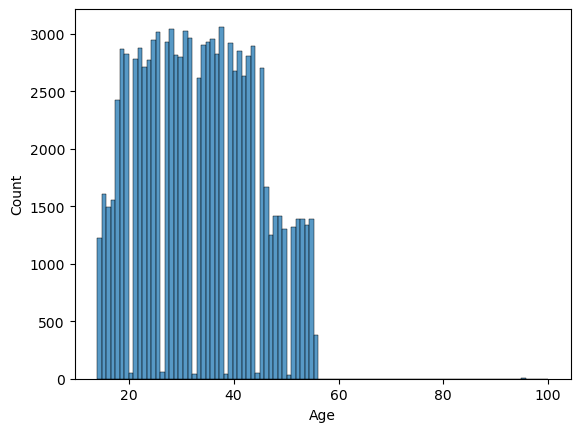

In [19]:
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
sns.histplot(df_train, x='Age', ax=ax, bins=100)

Okay now we can look at just values in a reasonable age range we have a spread I roughly expect with the majority of people aged around 20-50

In [20]:
df_train['Age'].describe()

count    100000.000000
mean         33.314434
std          10.773858
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max         100.000000
Name: Age, dtype: float64

### SSN
Is a random string of digits so we can go ahead and drop this now as we already have a customer ID to groupby

In [21]:
df_train.drop('SSN', axis=1, inplace=True)
df_test.drop('SSN', axis=1, inplace=True)

### Annual_Income
Currently an object column so let's try figure out why

In [22]:
df_train['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

Plagued by the underscores again...

In [23]:
df_train['Annual_Income'] = df_train['Annual_Income'].apply(lambda income: float(income.replace("_","")))
df_test['Annual_Income'] = df_test['Annual_Income'].apply(lambda income: float(income.replace("_","")))

In [24]:
df_train['Annual_Income'].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

(0.0, 200000.0)

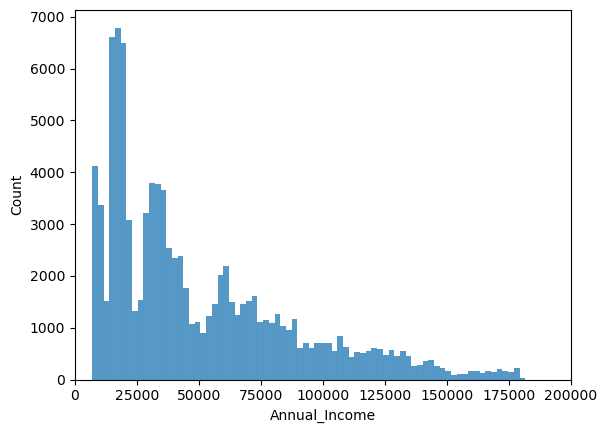

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=df_train["Annual_Income"], ax=ax)
ax.set_xlim(0, 200000)

Based on the above graph, seems as though anything above the sort of $200,000 mark is going to be an outlier. Let's see how many values are outside this range and what they are to check.

In [26]:
high_earners = df_train[df_train['Annual_Income'] > 200000]
high_earners['Customer_ID'].count()

999

In [27]:
high_earners['Annual_Income'].describe()

count    9.990000e+02
mean     1.265491e+07
std      6.870300e+06
min      2.518890e+05
25%      7.057950e+06
50%      1.295301e+07
75%      1.850880e+07
max      2.419806e+07
Name: Annual_Income, dtype: float64

<AxesSubplot: xlabel='Annual_Income', ylabel='Count'>

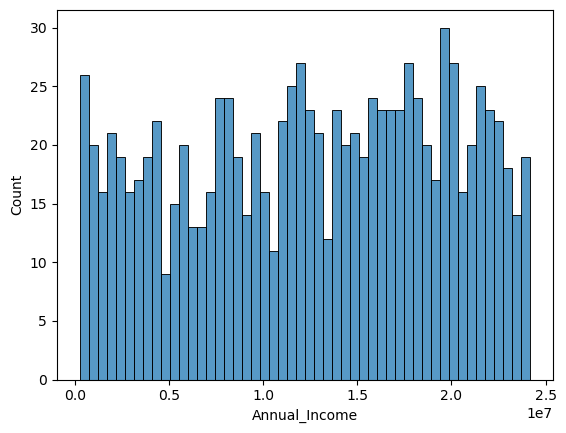

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=high_earners["Annual_Income"], bins=50, ax=ax)

Uniformly distributed is not exactly what I would expect for a distribution of salaries...

Let's try select on of the customer ID's of our "high earners"

In [29]:
high_earners['Customer_ID'].head()

54     CUS_0x284a
231    CUS_0xbffe
245    CUS_0x9a71
361    CUS_0x8e9b
368    CUS_0x609d
Name: Customer_ID, dtype: object

In [30]:
df_train[df_train['Customer_ID'] == "CUS_0x284a"]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
48,CUS_0x284a,1,33.0,Lawyer,131313.4,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,2.0,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good
49,CUS_0x284a,2,34.0,Lawyer,131313.4,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",-1,2,15.34,4.0,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good
50,CUS_0x284a,3,34.0,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,4.0,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good
51,CUS_0x284a,4,34.0,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good
52,CUS_0x284a,5,34.0,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,4,9.34,4.0,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good
53,CUS_0x284a,6,34.0,Lawyer,131313.4,NaN,0,1,8,-100,"Credit-Builder Loan, and Mortgage Loan",0,3_,11.34,4.0,Good,352.16,41.980170,31 Years and 0 Months,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard
54,CUS_0x284a,7,34.0,Lawyer,10909427.0,NaN,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
55,CUS_0x284a,8,34.0,Lawyer,131313.4,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,9.34,4.0,Good,352.16,29.187913,31 Years and 2 Months,No,911.220179,870.52238171816,Low_spent_Medium_value_payments,396.1113462137519,Good


In this case it is clearly just a mistype and this person should be on $131,313.4

Is this the case for others?

In [31]:
df_train[df_train['Customer_ID'] == "CUS_0xbffe"]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
224,CUS_0xbffe,1,40.0,Architect,28572.39,2210.0325,6,3,15,3,"Payday Loan, Not Specified, and Auto Loan",25,12,4.89,0.0,_,400.07,24.422251,30 Years and 3 Months,Yes,69.60292,42.85050714738581,High_spent_Large_value_payments,348.54982237062416,Standard
225,CUS_0xbffe,2,40.0,Architect,28572.39,2210.0325,6,3,15,3,"Payday Loan, Not Specified, and Auto Loan",25,9,4.89,0.0,Standard,400.07,36.437870,30 Years and 4 Months,NM,69.60292,83.0442090106474,!@9#%8,358.3561205073625,Standard
226,CUS_0xbffe,3,40.0,_______,28572.39,2210.0325,6,3,15,3,"Payday Loan, Not Specified, and Auto Loan",28,10,4.89,0.0,Standard,400.07,29.323517,30 Years and 5 Months,Yes,69.60292,53.484203285005805,High_spent_Medium_value_payments,347.91612623300415,Standard
227,CUS_0xbffe,4,40.0,Architect,28572.39,NaN,6,3,15,3,"Payday Loan, Not Specified, and Auto Loan",25,14,4.89,0.0,_,400.07,34.714561,30 Years and 6 Months,Yes,69.60292,25.99346229581731,High_spent_Medium_value_payments,375.4068672221926,Standard
228,CUS_0xbffe,5,40.0,Architect,28572.39,NaN,6,3,15,3,"Payday Loan, Not Specified, and Auto Loan",25,12,4.89,2.0,Standard,400.07,37.504552,30 Years and 7 Months,Yes,69.60292,61.628109134830005,High_spent_Medium_value_payments,339.77222038318,Standard
229,CUS_0xbffe,6,40.0,Architect,28572.39,NaN,6,3,668,3,"Payday Loan, Not Specified, and Auto Loan",25,11,4.89,2.0,Standard,400.07,35.693949,30 Years and 8 Months,Yes,69.60292,129.264834657262,Low_spent_Small_value_payments,312.13549486074794,Standard
230,CUS_0xbffe,7,40.0,Architect,28572.39,2210.0325,6,3,15,3,"Payday Loan, Not Specified, and Auto Loan",25,13,4.89,2.0,Standard,400.07,35.025883,NaN,Yes,69.60292,76.60780889167367,Low_spent_Small_value_payments,364.7925206263362,Standard
231,CUS_0xbffe,8,40.0,Architect,6515990.00,2210.0325,6,3,15,3,"Payday Loan, Not Specified, and Auto Loan",25,12,4.89,2.0,Standard,400.07,23.177617,30 Years and 10 Months,Yes,69.60292,51.83085897154975,High_spent_Large_value_payments,339.5694705464602,Standard


It appears that way. So let's figure out the threshold for a reasonable amount and then see if we can correct these values...Let's try over $200,000 as on our plot this seemed a reasonable value.

In [32]:
# Remove outliers
df_train['Annual_Income'] = df_train['Annual_Income'].apply(lambda Annual_Income: np.nan if Annual_Income > 200000 else Annual_Income)
df_test['Annual_Income'] = df_test['Annual_Income'].apply(lambda Annual_Income: np.nan if Annual_Income > 200000 else Annual_Income)

# Calculate mean without outliers
customer_Annual_Income = df_train.groupby('Customer_ID')['Annual_Income'].mean()

# Fill in missing data with customers mean annual income
def fill_Annual_Income(customer_ID,Annual_Income):
    return customer_Annual_Income[customer_ID] if np.isnan(Annual_Income) else Annual_Income
df_train['Annual_Income'] = df_train.apply(lambda x: fill_Annual_Income(x['Customer_ID'], x['Annual_Income']), axis=1)
df_test['Annual_Income'] = df_test.apply(lambda x: fill_Annual_Income(x['Customer_ID'], x['Annual_Income']), axis=1)

<AxesSubplot: xlabel='Annual_Income', ylabel='Count'>

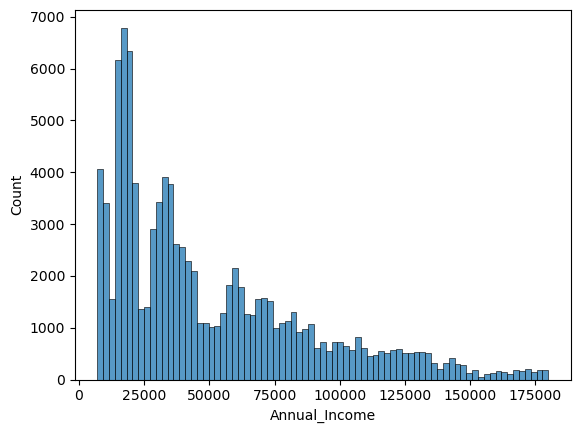

In [33]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=df_train["Annual_Income"], ax=ax)

In [34]:
df_train['Annual_Income'].describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

### Monthly in-hand salary
Has missing values

I guess the simplest way to do this would be to group by customer ID and then match the mean inhand salary. I guess a more careful way would be to see if the Annual_Income has changed and base the Monthly_Inhand_Salary on this as they are almost certainly going to be highly correlated.

In [35]:
customer_average_monthly_inhand = df_train.groupby('Customer_ID')['Monthly_Inhand_Salary'].mean()

def fill_monthly_inhand(customer_ID,Monthly_Inhand_Salary):
    return customer_average_monthly_inhand[customer_ID] if np.isnan(Monthly_Inhand_Salary) else Monthly_Inhand_Salary
  
df_train['Monthly_Inhand_Salary'] = df_train.apply(lambda x: fill_monthly_inhand(x['Customer_ID'], x['Monthly_Inhand_Salary']), axis=1)
df_test['Monthly_Inhand_Salary'] = df_test.apply(lambda x: fill_monthly_inhand(x['Customer_ID'], x['Monthly_Inhand_Salary']), axis=1)

<AxesSubplot: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

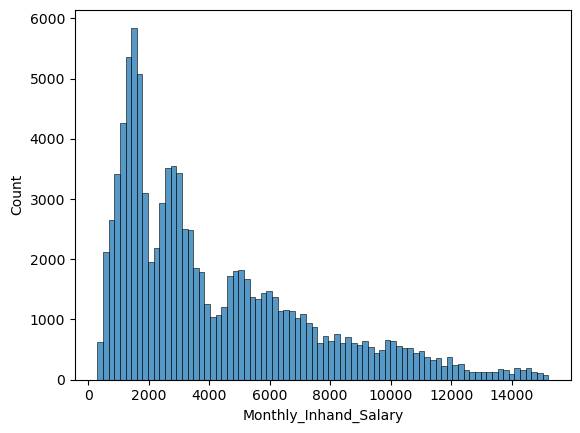

In [36]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=df_train["Monthly_Inhand_Salary"], ax=ax)

<AxesSubplot: xlabel='Annual_Income', ylabel='Monthly_Inhand_Salary'>

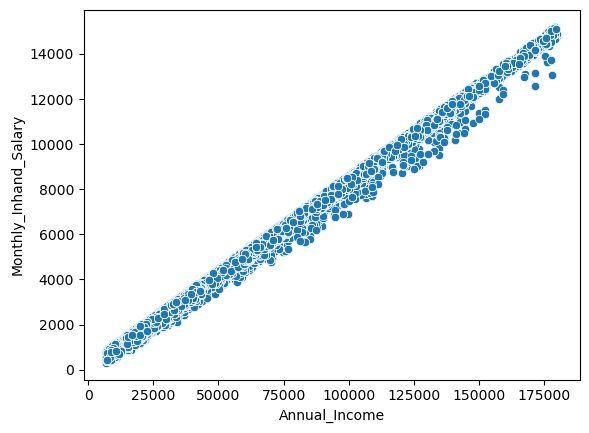

In [37]:
sns.scatterplot(df_train, x='Annual_Income', y='Monthly_Inhand_Salary')

As expected (and logically) these are highly correlated variables, realistically can probably drop one of them in the ML input for this reason.

Values seem reasonable so leaving alone

### Number of bank accounts
Already an integer so let's just see how these are distributed

In [38]:
df_train['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

Have negative values but also crazy outliers!

<AxesSubplot: xlabel='Num_Bank_Accounts', ylabel='Count'>

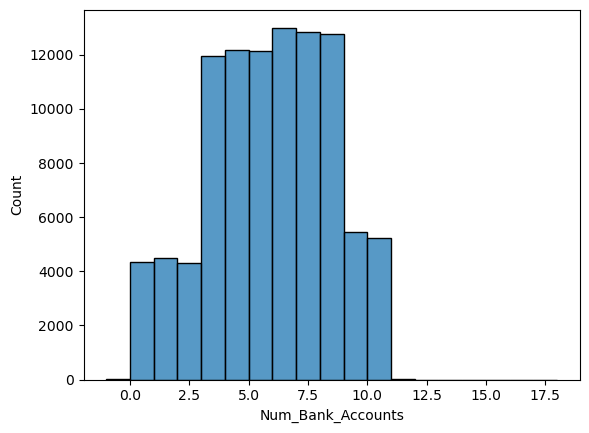

In [39]:
sns.histplot(df_train[df_train['Num_Bank_Accounts'] < 20], x='Num_Bank_Accounts', binwidth=1)

In [40]:
df_train[df_train['Num_Bank_Accounts'] > 20]['Num_Bank_Accounts'].describe()

count    1314.000000
mean      897.569254
std       512.955410
min        26.000000
25%       464.500000
50%       885.500000
75%      1334.250000
max      1798.000000
Name: Num_Bank_Accounts, dtype: float64

Negative values are minimal so can potentially drop these. Outliers I would classify as anything above 20 although somewhat arbitary. We do have the minimum above this value of 26 which could potentially still be reasonable...But unlikely.

Let's check to see which customers these outliers belong to and whether they are legitimate or incorrect

In [41]:
high_bank_accounts = df_train[df_train['Num_Bank_Accounts'] > 20]
high_bank_accounts['Customer_ID'].head()

267    CUS_0x4004
288    CUS_0x4080
310    CUS_0x42ac
339    CUS_0x9bc1
356    CUS_0xaedb
Name: Customer_ID, dtype: object

In [42]:
df_train[df_train['Customer_ID'] == "CUS_0x4004"]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
264,CUS_0x4004,1,43.0,Writer,58317.0,4664.75,8,5,9,6,"Mortgage Loan, Personal Loan, Home Equity Loan...",18,17,16.58,6.0,Standard,98.97,40.411115,13 Years and 1 Months,Yes,149.897199,109.48894961827229,!@9#%8,467.0888509607195,Standard
265,CUS_0x4004,2,43.0,Writer,58317.0,4664.75,8,5,9,6,"Mortgage Loan, Personal Loan, Home Equity Loan...",18,20,16.58,6.0,Standard,98.97,27.806918,13 Years and 2 Months,Yes,149.897199,83.30040818642512,High_spent_Medium_value_payments,483.2773923925665,Standard
266,CUS_0x4004,3,44.0,Writer,58317.0,4664.75,8,5,9,6,"Mortgage Loan, Personal Loan, Home Equity Loan...",16,20,10.579999999999998,6.0,_,98.97,25.832109,13 Years and 3 Months,Yes,149.897199,57.95122336180115,High_spent_Large_value_payments,498.6265772171906,Standard
267,CUS_0x4004,4,44.0,Writer,58317.0,4664.75,1414,5,9,6,"Mortgage Loan, Personal Loan, Home Equity Loan...",18,23,23.58,10.0,Standard,98.97,29.766107,NaN,Yes,149.897199,158.64827595455043,High_spent_Medium_value_payments,407.9295246244412,Standard
268,CUS_0x4004,5,44.0,Writer,58317.0,4664.75,8,5,9,6,"Mortgage Loan, Personal Loan, Home Equity Loan...",18,20,22.58,NaN,Standard,98.97,34.192304,13 Years and 5 Months,Yes,149.897199,180.83057335204728,Low_spent_Medium_value_payments,415.7472272269445,Standard
269,CUS_0x4004,6,44.0,Writer,58317.0,4664.75,8,5,9,6,"Mortgage Loan, Personal Loan, Home Equity Loan...",18,NaN,16.58,10.0,Standard,98.97,24.665525,13 Years and 6 Months,Yes,149.897199,98.88050778293751,High_spent_Medium_value_payments,467.6972927960543,Standard
270,CUS_0x4004,7,44.0,Writer,58317.0,4664.75,8,5,9,6,"Mortgage Loan, Personal Loan, Home Equity Loan...",18,20,21.58,10.0,Standard,98.97,28.260147,13 Years and 7 Months,Yes,149.897199,380.5857010101063,Low_spent_Medium_value_payments,215.9920995688854,Standard
271,CUS_0x4004,8,44.0,Writer,58317.0,4664.75,8,5,9,6,"Mortgage Loan, Personal Loan, Home Equity Loan...",22,NaN,16.58,10.0,Standard,98.97,36.763665,13 Years and 8 Months,Yes,149.897199,59.955987495996,High_spent_Medium_value_payments,506.62181308299586,Standard


In [43]:
df_train[df_train['Customer_ID'] == "CUS_0x4080"]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
288,CUS_0x4080,1,16.0,Mechanic,29469.98,2227.831667,1231,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",53,21,26.94,11.0,_,3421.66,24.639658,NaN,Yes,69.685459,59.825596124675045,!@9#%8,363.27211196971183,Standard
289,CUS_0x4080,2,16.0,Mechanic,29469.98,2227.831667,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",50,18,22.94,NaN,Bad,3421.66,30.268411,13 Years and 3 Months,NM,69.685459,125.49176826031132,High_spent_Small_value_payments,287.6059398340756,Standard
290,CUS_0x4080,3,16.0,Mechanic,29469.98,2227.831667,7,7,24,-100,"Personal Loan, Credit-Builder Loan, Debt Conso...",53,24,27.94,11.0,_,3421.66,31.212269,13 Years and 4 Months,Yes,69.685459,32.70665182089997,High_spent_Large_value_payments,360.39105627348687,Standard
291,CUS_0x4080,4,16.0,Mechanic,29469.98,2227.831667,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",53,21,26.94,11.0,Bad,3421.66,33.298654,13 Years and 5 Months,Yes,69.685459,27.250794632521444,High_spent_Medium_value_payments,375.84691346186537,Poor
292,CUS_0x4080,5,16.0,Mechanic,29469.98,2227.831667,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",53,21,26.94,11.0,Bad,3421.66,38.177311,13 Years and 6 Months,Yes,69.685459,71.26438577406131,Low_spent_Medium_value_payments,361.83332232032564,Poor
293,CUS_0x4080,6,16.0,Mechanic,29469.98,2227.831667,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",53,21,27.94,11.0,Bad,3421.66,30.986998,13 Years and 7 Months,Yes,69.685459,117.31031613952459,Low_spent_Small_value_payments,325.7873919548623,Poor
294,CUS_0x4080,7,16.0,Mechanic,29469.98,2227.831667,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",58,24,26.94,11.0,Bad,3421.66,33.283061,13 Years and 8 Months,Yes,69.685459,115.45341572596944,Low_spent_Small_value_payments,327.64429236841744,Poor
295,CUS_0x4080,8,16.0,Mechanic,29469.98,2227.831667,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",53,21,26.94,11.0,Bad,3421.66,32.962950,13 Years and 9 Months,Yes,69.685459,24.066131449353737,High_spent_Medium_value_payments,379.0315766450331,Poor


Outliers seem to be incorrect information. Let's remove the outliers and fix with the mean value.

In [44]:
# Remove outliers
df_train['Num_Bank_Accounts'] = df_train['Num_Bank_Accounts'].apply(lambda Num_Bank_Accounts: np.nan if Num_Bank_Accounts > 20 else Num_Bank_Accounts)
df_test['Num_Bank_Accounts'] = df_test['Num_Bank_Accounts'].apply(lambda Num_Bank_Accounts: np.nan if Num_Bank_Accounts > 20 else Num_Bank_Accounts)

# Calculate mean without outliers
customer_num_bank_accounts = df_train.groupby('Customer_ID')['Num_Bank_Accounts'].mean()

# Fill in missing data with customers mean annual income
def fill_num_bank_accounts(customer_ID,Num_Bank_Accounts):
    return customer_num_bank_accounts[customer_ID] if np.isnan(Num_Bank_Accounts) else Num_Bank_Accounts
df_train['Num_Bank_Accounts'] = df_train.apply(lambda x: fill_num_bank_accounts(x['Customer_ID'], x['Num_Bank_Accounts']), axis=1)
df_test['Num_Bank_Accounts'] = df_test.apply(lambda x: fill_num_bank_accounts(x['Customer_ID'], x['Num_Bank_Accounts']), axis=1)

### Number of credit cards
Already an integer so let's just check legitamacy of it

In [45]:
df_train['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

Low value is fine at 0 but high value is just wrong. Let's fix the same way we've fixed all other variables. Need to find out what a realistic maximum value is. Let's try 10 and see how that is.

In [46]:
high_credit_cards = df_train[df_train['Num_Credit_Card'] > 10]
high_credit_cards['Num_Credit_Card'].describe()

count    2307.000000
mean      739.953619
std       441.511590
min        11.000000
25%       333.000000
50%       744.000000
75%      1126.000000
max      1499.000000
Name: Num_Credit_Card, dtype: float64

In [47]:
high_credit_cards = df_train[df_train['Num_Credit_Card'] > 20]
high_credit_cards['Num_Credit_Card'].describe()

count    2263.000000
mean      754.107380
std       433.838592
min        21.000000
25%       362.000000
50%       757.000000
75%      1131.000000
max      1499.000000
Name: Num_Credit_Card, dtype: float64

<AxesSubplot: xlabel='Num_Credit_Card', ylabel='Count'>

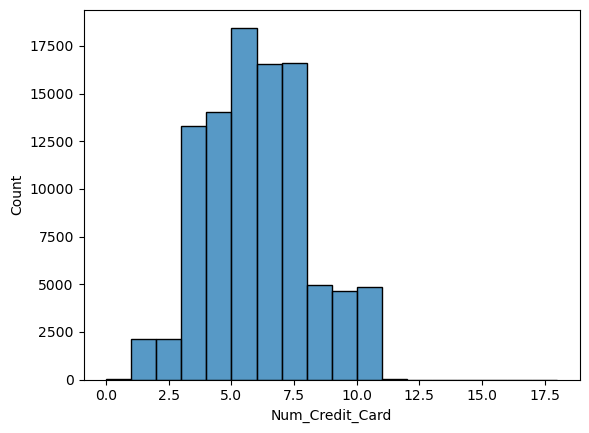

In [48]:
low_credit_cards = df_train[df_train['Num_Credit_Card'] < 20]
sns.histplot(low_credit_cards, x='Num_Credit_Card', binwidth=1)

Okay anything over 12 seems to be an outlier. Let's use 15 to be safe

In [49]:
# Remove outliers
df_train['Num_Credit_Card'] = df_train['Num_Credit_Card'].apply(lambda Num_Credit_Card: np.nan if Num_Credit_Card > 20 else Num_Credit_Card)
df_test['Num_Credit_Card'] = df_test['Num_Credit_Card'].apply(lambda Num_Credit_Card: np.nan if Num_Credit_Card > 20 else Num_Credit_Card)

# Calculate mean without outliers
customer_num_credit_card = df_train.groupby('Customer_ID')['Num_Credit_Card'].mean()

# Fill in missing data with customers mean annual income
def fill_num_credit_card(customer_ID,Num_Credit_Card):
    return customer_num_credit_card[customer_ID] if np.isnan(Num_Credit_Card) else Num_Credit_Card
df_train['Num_Credit_Card'] = df_train.apply(lambda x: fill_num_credit_card(x['Customer_ID'], x['Num_Credit_Card']), axis=1)
df_test['Num_Credit_Card'] = df_test.apply(lambda x: fill_num_credit_card(x['Customer_ID'], x['Num_Credit_Card']), axis=1)

### Interest Rate
Already numerical and no missing values so is everything in order?

In [50]:
df_train['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

I mean technically this is all correct, someone could be charged a 5797% interest rate although realistically this is not very likely. Let's see what a more realistic ceiling is.

<AxesSubplot: xlabel='Interest_Rate', ylabel='Count'>

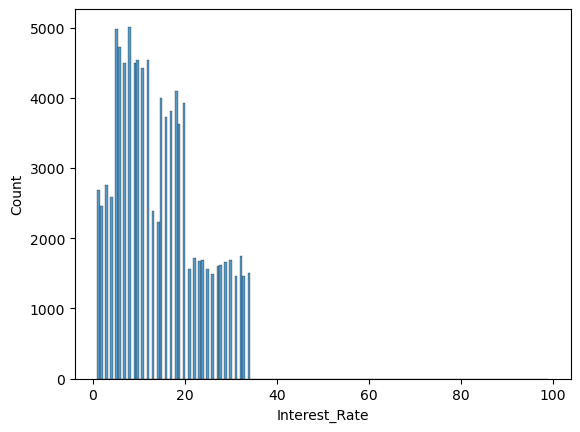

In [51]:
low_interest_rate = df_train[df_train['Interest_Rate'] < 100]
sns.histplot(low_interest_rate, x='Interest_Rate')

Let's set the ceiling on interest rate to 40%

In [52]:
# Remove outliers
df_train['Interest_Rate'] = df_train['Interest_Rate'].apply(lambda Interest_Rate: np.nan if Interest_Rate > 40 else Interest_Rate)
df_test['Interest_Rate'] = df_test['Interest_Rate'].apply(lambda Interest_Rate: np.nan if Interest_Rate > 40 else Interest_Rate)

# Calculate mean without outliers
customer_interest_rate = df_train.groupby('Customer_ID')['Interest_Rate'].mean()

# Fill in missing data with customers mean annual income
def fill_interest_rate(customer_ID,Interest_Rate):
    return customer_interest_rate[customer_ID] if np.isnan(Interest_Rate) else Interest_Rate
df_train['Interest_Rate'] = df_train.apply(lambda x: fill_interest_rate(x['Customer_ID'], x['Interest_Rate']), axis=1)
df_test['Interest_Rate'] = df_test.apply(lambda x: fill_interest_rate(x['Customer_ID'], x['Interest_Rate']), axis=1)

In [53]:
df_train.isnull().sum().apply(lambda x: 100*(x/len(df_train)))

Customer_ID                  0.000
Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

### Number of loans
No missing values, currently not a number but I expect it to be so...

In [54]:
df_train['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [55]:
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].apply(lambda income: float(income.replace("_","")))
df_test['Num_of_Loan'] = df_test['Num_of_Loan'].apply(lambda income: float(income.replace("_","")))

In [56]:
df_train['Num_of_Loan'].describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

negative values do not make sense and max is ridiculously high. What's a more realistic maximum...

(0.0, 20.0)

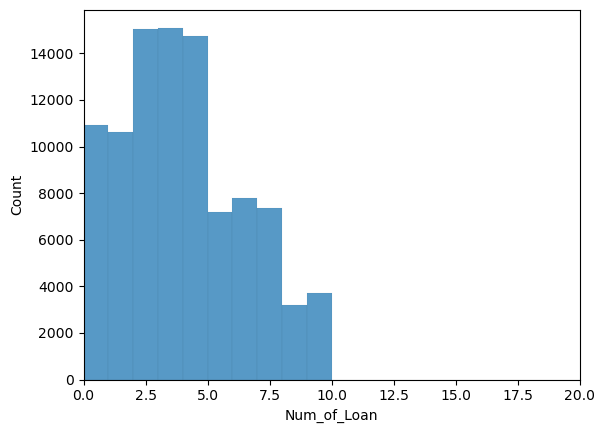

In [57]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=df_train["Num_of_Loan"], ax=ax, binwidth=1)
ax.set_xlim(0, 20)

Seems to be a reasonable limit at 10 loans, let's set the ceiling to 15 so we have some wiggle room

In [58]:
# Remove outliers
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].apply(lambda Num_of_Loan: np.nan if (Num_of_Loan < 0 or Num_of_Loan > 15) else Num_of_Loan)
df_test['Num_of_Loan'] = df_test['Num_of_Loan'].apply(lambda Num_of_Loan: np.nan if (Num_of_Loan < 0 or Num_of_Loan > 15) else Num_of_Loan)

# Calculate mean without outliers
customer_Num_of_Loan = df_train.groupby('Customer_ID')['Num_of_Loan'].mean()

# Fill in missing data with customers mean age
def fill_num_of_loan(customer_ID,Num_of_Loan):
    return customer_Num_of_Loan[customer_ID] if np.isnan(Num_of_Loan) else Num_of_Loan
df_train['Num_of_Loan'] = df_train.apply(lambda x: fill_num_of_loan(x['Customer_ID'], x['Num_of_Loan']), axis=1)
df_test['Num_of_Loan'] = df_test.apply(lambda x: fill_num_of_loan(x['Customer_ID'], x['Num_of_Loan']), axis=1)

### Delay_from_due_date
No missing values and already integer so are the values reasonable?

In [59]:
df_train['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

So I guess negative values here do make sense as would be paying off early. Additionally having a delay of 67 days is also still reasonable as this would be a delay of approximately 2 months. Therefore for now I will leave this column alone as I do not have further context for whether or not these values are in fact reasonable

### Number of delayed payments
Missing values and currently an object

In [60]:
df_train['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [61]:
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].apply(lambda delayed_payment: float(delayed_payment.replace("_","")) if not isinstance(delayed_payment, float) else delayed_payment)
df_test['Num_of_Delayed_Payment'] = df_test['Num_of_Delayed_Payment'].apply(lambda delayed_payment: float(delayed_payment.replace("_","")) if not isinstance(delayed_payment, float) else delayed_payment)

In [62]:
df_train['Num_of_Delayed_Payment'].describe()

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

(0.0, 50.0)

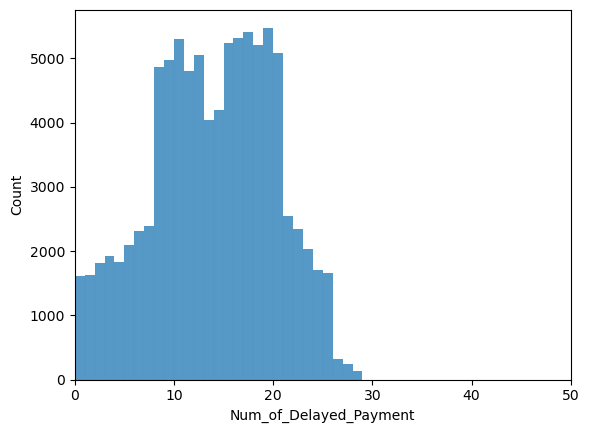

In [63]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=df_train["Num_of_Delayed_Payment"], ax=ax, binwidth=1)
ax.set_xlim(0, 50)

Anything above say 30 seems like an outlier. Let's check what is going on...

In [64]:
high_delayed_payments = df_train[df_train['Num_of_Delayed_Payment'] > 30]
high_delayed_payments['Customer_ID'].head()

252    CUS_0x6048
284    CUS_0x9b94
304    CUS_0x42ac
409    CUS_0xb986
643    CUS_0x78e0
Name: Customer_ID, dtype: object

In [65]:
df_train[df_train['Customer_ID'] == "CUS_0x6048"]['Num_of_Delayed_Payment']

248      21.0
249      21.0
250      21.0
251      22.0
252    3318.0
253      21.0
254      21.0
255      18.0
Name: Num_of_Delayed_Payment, dtype: float64

Let's approximate with the mean

In [66]:
# Remove outliers
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].apply(lambda Num_of_Delayed_Payment: np.nan if (Num_of_Delayed_Payment < 0 or Num_of_Delayed_Payment > 30) else Num_of_Delayed_Payment)
df_test['Num_of_Delayed_Payment'] = df_test['Num_of_Delayed_Payment'].apply(lambda Num_of_Delayed_Payment: np.nan if (Num_of_Delayed_Payment < 0 or Num_of_Delayed_Payment > 30) else Num_of_Delayed_Payment)

# Calculate mean without outliers
customer_Num_of_Delayed_Payment = df_train.groupby('Customer_ID')['Num_of_Delayed_Payment'].mean()

# Fill in missing data with customers mean number of delayed payments
def fill_num_of_delayed_payments(customer_ID,Num_of_Delayed_Payment):
    return customer_Num_of_Delayed_Payment[customer_ID] if np.isnan(Num_of_Delayed_Payment) else Num_of_Delayed_Payment
df_train['Num_of_Delayed_Payment'] = df_train.apply(lambda x: fill_num_of_delayed_payments(x['Customer_ID'], x['Num_of_Delayed_Payment']), axis=1)
df_test['Num_of_Delayed_Payment'] = df_test.apply(lambda x: fill_num_of_delayed_payments(x['Customer_ID'], x['Num_of_Delayed_Payment']), axis=1)

### Changed_Credit_Limit
No missing values and an object. Represents percentage change in credit limit so positive and negative values make sense.

In [67]:
df_train['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [68]:
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].apply(lambda credit_limit: np.nan if credit_limit=='_' else credit_limit)
df_test['Changed_Credit_Limit'] = df_test['Changed_Credit_Limit'].apply(lambda credit_limit: np.nan if credit_limit=='_' else credit_limit)

In [69]:
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].apply(lambda credit_limit: float(credit_limit.replace("_","")) if not isinstance(credit_limit, float) else credit_limit)
df_test['Changed_Credit_Limit'] = df_test['Changed_Credit_Limit'].apply(lambda credit_limit: float(credit_limit.replace("_","")) if not isinstance(credit_limit, float) else credit_limit)

In [70]:
df_train['Changed_Credit_Limit'].describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

Values seem reasonable although now missing values because of removing "_". Let's fix this by taking the mean value for each customer

In [71]:
# Calculate mean
customer_changed_credit_limit = df_train.groupby('Customer_ID')['Changed_Credit_Limit'].mean()

# Fill in missing data with customers mean number of delayed payments
def fill_changed_credit_limit(customer_ID, Changed_Credit_Limit):
    return customer_changed_credit_limit[customer_ID] if np.isnan(Changed_Credit_Limit) else Changed_Credit_Limit
df_train['Changed_Credit_Limit'] = df_train.apply(lambda x: fill_changed_credit_limit(x['Customer_ID'], x['Changed_Credit_Limit']), axis=1)
df_test['Changed_Credit_Limit'] = df_test.apply(lambda x: fill_changed_credit_limit(x['Customer_ID'], x['Changed_Credit_Limit']), axis=1)

<AxesSubplot: xlabel='Changed_Credit_Limit', ylabel='Count'>

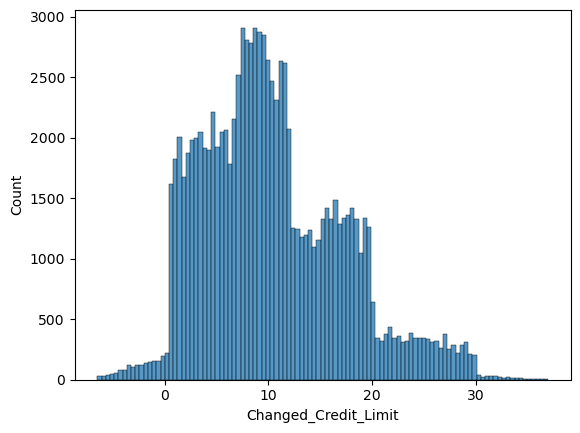

In [72]:
sns.histplot(x=df_train["Changed_Credit_Limit"])

### Number of Credit Inquiries
Should be an integer as a count. Missing some values too.

In [73]:
df_train['Num_Credit_Inquiries'].describe()

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

(0.0, 50.0)

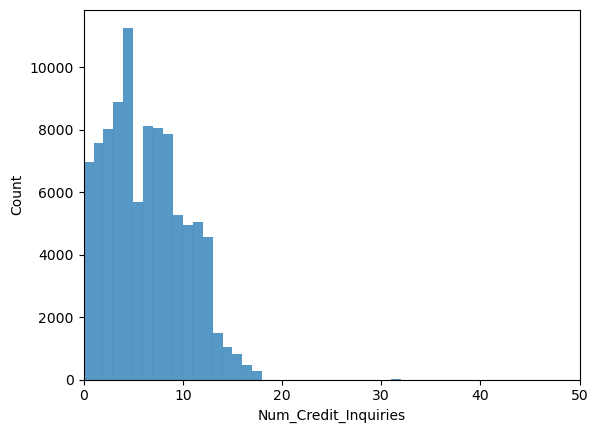

In [74]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=df_train["Num_Credit_Inquiries"], ax=ax, binwidth=1)
ax.set_xlim(0, 50)

Anything above 20 seems to be false data. Let's fix with the mean inquiries per customer

In [75]:
# Remove outliers
df_train['Num_Credit_Inquiries'] = df_train['Num_Credit_Inquiries'].apply(lambda Num_Credit_Inquiries: np.nan if Num_Credit_Inquiries > 20 else Num_Credit_Inquiries)
df_test['Num_Credit_Inquiries'] = df_test['Num_Credit_Inquiries'].apply(lambda Num_Credit_Inquiries: np.nan if Num_Credit_Inquiries > 20 else Num_Credit_Inquiries)

# Calculate mean without outliers
customer_Num_Credit_Inquiries = df_train.groupby('Customer_ID')['Num_Credit_Inquiries'].mean()

# Fill in missing data with customers mean number of delayed payments
def fill_num_credit_inquiries(customer_ID,Num_Credit_Inquiries):
    return customer_Num_Credit_Inquiries[customer_ID] if np.isnan(Num_Credit_Inquiries) else Num_Credit_Inquiries
df_train['Num_Credit_Inquiries'] = df_train.apply(lambda x: fill_num_credit_inquiries(x['Customer_ID'], x['Num_Credit_Inquiries']), axis=1)
df_test['Num_Credit_Inquiries'] = df_test.apply(lambda x: fill_num_credit_inquiries(x['Customer_ID'], x['Num_Credit_Inquiries']), axis=1)

### Outstanding Debt
Object, no missing data

In [76]:
df_train['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [77]:
df_train['Outstanding_Debt'] = df_train['Outstanding_Debt'].apply(lambda outstanding_debt: float(outstanding_debt.replace("_","")) if not isinstance(outstanding_debt, float) else outstanding_debt)
df_test['Outstanding_Debt'] = df_test['Outstanding_Debt'].apply(lambda outstanding_debt: float(outstanding_debt.replace("_","")) if not isinstance(outstanding_debt, float) else outstanding_debt)

In [78]:
df_train['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

All reasonable so leaving alone

### Credit Utilisation Ratio
Already floats and no missing data so are they reasonable...Should be values between 0 and 100 as this is a percentage utilisation

In [79]:
df_train['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

All good so moving on.

### Credit_History_Age
Currently an object with some missing data too

In [80]:
df_train['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

Not the easiest to work with...Should we just extract the year? How do we fill in missing values? 
As each string is "x Years and y Months" we can do some string manipulation to obtain this value. Let's keep the information as a single column and let's put this in terms of the number of months we have history for.

In [81]:
df_train[df_train['Customer_ID'] == "CUS_0x4080"][['Customer_ID', 'Month','Credit_History_Age']]

,Customer_ID,Month,Credit_History_Age
288,CUS_0x4080,1,NaN
289,CUS_0x4080,2,13 Years and 3 Months
290,CUS_0x4080,3,13 Years and 4 Months
291,CUS_0x4080,4,13 Years and 5 Months
292,CUS_0x4080,5,13 Years and 6 Months
293,CUS_0x4080,6,13 Years and 7 Months
294,CUS_0x4080,7,13 Years and 8 Months
295,CUS_0x4080,8,13 Years and 9 Months


In [82]:
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda s : 12*float(s.split()[0]) + float(s.split()[3]) if s is not np.nan else np.nan)
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].apply(lambda s : 12*float(s.split()[0]) + float(s.split()[3]) if s is not np.nan else np.nan)

In [83]:
display(df_train[df_train['Customer_ID'] == "CUS_0x4080"][['Customer_ID', 'Month','Credit_History_Age']])
display(df_train[df_train['Customer_ID'] == "CUS_0xd40"][['Customer_ID', 'Month', 'Credit_History_Age']])

,Customer_ID,Month,Credit_History_Age
288,CUS_0x4080,1,NaN
289,CUS_0x4080,2,159.0
290,CUS_0x4080,3,160.0
291,CUS_0x4080,4,161.0
292,CUS_0x4080,5,162.0
293,CUS_0x4080,6,163.0
294,CUS_0x4080,7,164.0
295,CUS_0x4080,8,165.0


,Customer_ID,Month,Credit_History_Age
0,CUS_0xd40,1,265.0
1,CUS_0xd40,2,NaN
2,CUS_0xd40,3,267.0
3,CUS_0xd40,4,268.0
4,CUS_0xd40,5,269.0
5,CUS_0xd40,6,270.0
6,CUS_0xd40,7,271.0
7,CUS_0xd40,8,NaN


Can use ffill() to forward fill each customers credit_history_age but need to be careful in case the first value is missing. In this case we can use bfill().

I have been testing the below function quite a lot to try and fix it but alas no luck :( 
  
The problem resides in the backwards filling as I cannot seem to get the correct count for subtracting such that I do not get the value repeated. 
e.g with input [np.nan, np.nan, np.nan, 14, 15, 16] I would get the output [11,12,13,13,14,15,16] 
This means that I will have data that is incorrect by a small amount and we can hope this does not effect the final accuracy of my model too much...This is something that can very much be come back to and attempted to fix 

In [84]:
def fill_missing_credit_history_age(series):
    # series.ffill() + series.isna().astype(int) does not work for multiple missing values in a row
    filled_forward = series.ffill() + series.groupby(series.notna().cumsum()).cumcount()
    filled_backward = filled_forward.bfill() - filled_forward.groupby(filled_forward.notna().cumsum()).cumcount(ascending=False)
    return filled_backward

df_train['Credit_History_Age'] = df_train.groupby('Customer_ID')['Credit_History_Age'].transform(fill_missing_credit_history_age)
df_test['Credit_History_Age'] = df_test.groupby('Customer_ID')['Credit_History_Age'].transform(fill_missing_credit_history_age)

In [85]:
display(df_train[df_train['Customer_ID'] == "CUS_0x4080"][['Customer_ID', 'Month','Credit_History_Age']])
display(df_train[df_train['Customer_ID'] == "CUS_0xd40"][['Customer_ID', 'Month', 'Credit_History_Age']])

,Customer_ID,Month,Credit_History_Age
288,CUS_0x4080,1,159.0
289,CUS_0x4080,2,159.0
290,CUS_0x4080,3,160.0
291,CUS_0x4080,4,161.0
292,CUS_0x4080,5,162.0
293,CUS_0x4080,6,163.0
294,CUS_0x4080,7,164.0
295,CUS_0x4080,8,165.0


,Customer_ID,Month,Credit_History_Age
0,CUS_0xd40,1,265.0
1,CUS_0xd40,2,266.0
2,CUS_0xd40,3,267.0
3,CUS_0xd40,4,268.0
4,CUS_0xd40,5,269.0
5,CUS_0xd40,6,270.0
6,CUS_0xd40,7,271.0
7,CUS_0xd40,8,272.0


Yes this works! Let's check to see if we still have any missing values.

In [86]:
df_train['Credit_History_Age'].isnull().sum()

0

In [87]:
no_credit_history_age = df_train[df_train['Credit_History_Age'].isna()]
no_credit_history_age['Customer_ID'].value_counts()


Series([], Name: Customer_ID, dtype: int64)

In [88]:
df_train[df_train['Customer_ID'] == "CUS_0xa123"][['Customer_ID', 'Month', 'Credit_History_Age']]

,Customer_ID,Month,Credit_History_Age
54496,CUS_0xa123,1,274.0
54497,CUS_0xa123,2,275.0
54498,CUS_0xa123,3,276.0
54499,CUS_0xa123,4,277.0
54500,CUS_0xa123,5,277.0
54501,CUS_0xa123,6,278.0
54502,CUS_0xa123,7,279.0
54503,CUS_0xa123,8,280.0


Yep here we see the problem I outlined where it's not perfect on the backwards filling but fine. Let's move on as this was the last column I needed to come back and fix before starting to train some ML models.

### Total_EMI_per_month
Already floats and no missing data so is it reasonable?

In [89]:
df_train['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

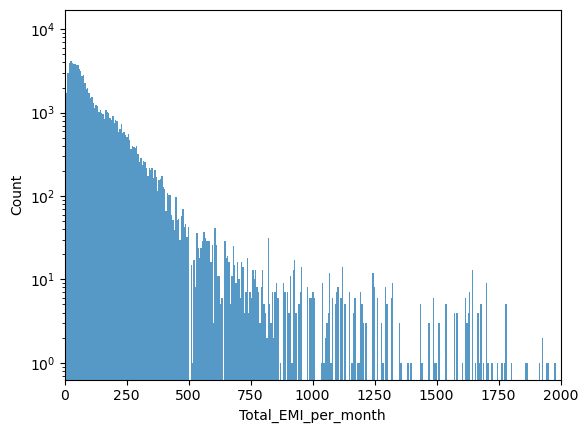

In [90]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=df_train["Total_EMI_per_month"], ax=ax)
ax.set_xlim(0, 2000)
plt.yscale("log")

In [91]:
high_EMI = df_train[df_train['Total_EMI_per_month'] > 500]
high_EMI['Customer_ID'].head()
df_train[df_train['Customer_ID'] == "CUS_0x95ee"][['Customer_ID','Total_EMI_per_month']]

,Customer_ID,Total_EMI_per_month
40,CUS_0x95ee,15015.0
41,CUS_0x95ee,0.0
42,CUS_0x95ee,0.0
43,CUS_0x95ee,0.0
44,CUS_0x95ee,0.0
45,CUS_0x95ee,15515.0
46,CUS_0x95ee,0.0
47,CUS_0x95ee,0.0


"An equated monthly installment (EMI) is a fixed payment amount made by a borrower to a lender at a specified date each calendar month" - https://www.investopedia.com/terms/e/equated_monthly_installment.asp

So I guess this means that if this value changes drastically then it is an outlier and should be removed. Let's try check out some values close to my arbitary cut-off at 500 and see if they are legitamate or not.

In [92]:
EMI_subgroup = df_train.loc[(df_train['Total_EMI_per_month'] > 1000) & (df_train['Total_EMI_per_month'] < 1500)]
EMI_subgroup['Customer_ID'].unique()

array(['CUS_0x2827', 'CUS_0x6435', 'CUS_0x541', 'CUS_0x6ab3',
       'CUS_0xc2a4', 'CUS_0x3f41', 'CUS_0x3ff5', 'CUS_0x93cd',
       'CUS_0x2543', 'CUS_0x66bb', 'CUS_0x8a74', 'CUS_0x7e2a',
       'CUS_0x181a', 'CUS_0x6276', 'CUS_0xc064', 'CUS_0xbfa1',
       'CUS_0x1182', 'CUS_0xb14f', 'CUS_0x4846', 'CUS_0xa8ec',
       'CUS_0x73cf', 'CUS_0xc1b4', 'CUS_0x5451', 'CUS_0x58d4',
       'CUS_0xa2b8', 'CUS_0x54bd', 'CUS_0x2907', 'CUS_0xbc05',
       'CUS_0x5b7', 'CUS_0x72c0', 'CUS_0x10df', 'CUS_0xab1e', 'CUS_0xe6c',
       'CUS_0x7801', 'CUS_0xb88c', 'CUS_0x9538', 'CUS_0xa9a',
       'CUS_0x438d', 'CUS_0x9275', 'CUS_0x5234', 'CUS_0x6136',
       'CUS_0x7756', 'CUS_0x2912', 'CUS_0x4be', 'CUS_0x3d99',
       'CUS_0x2d3e', 'CUS_0xa974', 'CUS_0x2f3d', 'CUS_0x7bc5',
       'CUS_0x35bd', 'CUS_0x3033', 'CUS_0x8d2', 'CUS_0x43fc',
       'CUS_0x1915', 'CUS_0xbd57', 'CUS_0x7672', 'CUS_0x7830',
       'CUS_0x7b39', 'CUS_0x264b', 'CUS_0x4e71', 'CUS_0x9368',
       'CUS_0x869', 'CUS_0x8b4f', 'CUS_0xacf', 

In [93]:
df_train[df_train['Customer_ID'] == "CUS_0x3553"][['Customer_ID','Total_EMI_per_month']]

,Customer_ID,Total_EMI_per_month
144,CUS_0x3553,0.000000
145,CUS_0x3553,0.000000
146,CUS_0x3553,0.000000
147,CUS_0x3553,629.815653
148,CUS_0x3553,629.815653
149,CUS_0x3553,629.815653
150,CUS_0x3553,629.815653
151,CUS_0x3553,629.815653


This person is legitamate and just started paying in April onwards.

In [94]:
df_train[df_train['Customer_ID'] == "CUS_0x9b3c"][['Customer_ID','Total_EMI_per_month']]

,Customer_ID,Total_EMI_per_month
384,CUS_0x9b3c,574.065798
385,CUS_0x9b3c,574.065798
386,CUS_0x9b3c,574.065798
387,CUS_0x9b3c,574.065798
388,CUS_0x9b3c,574.065798
389,CUS_0x9b3c,574.065798
390,CUS_0x9b3c,574.065798
391,CUS_0x9b3c,574.065798


Another genuine one...Where is the threshold going to be?
Just going to leave this one as not too sure on how to go about determining what is genuine and what is not.

### Amount_invested_monthly
Object and missing values

In [95]:
df_train['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)

In [96]:
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].apply(lambda amount_invested: float(amount_invested.replace("_", "")) if not isinstance(amount_invested, float) else amount_invested)
df_test['Amount_invested_monthly'] = df_test['Amount_invested_monthly'].apply(lambda amount_invested: float(amount_invested.replace("_", "")) if not isinstance(amount_invested, float) else amount_invested)

In [97]:
df_train['Amount_invested_monthly'].describe()

count    95521.000000
mean       637.412998
std       2043.319327
min          0.000000
25%         74.534002
50%        135.925682
75%        265.731733
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

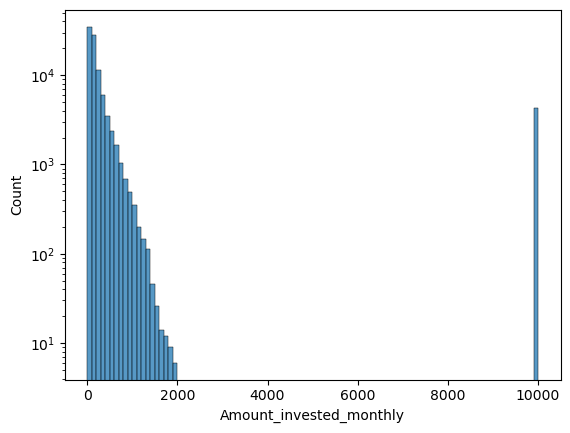

In [98]:
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=df_train["Amount_invested_monthly"], ax=ax, bins=100)
#ax.set_xlim(0, 2000)
plt.yscale("log")

Do we think anything over 2000 is genuine? How many data points are above this value?

In [99]:
invested_subgroup = df_train.loc[(df_train['Amount_invested_monthly'] > 2000)]
invested_subgroup['Customer_ID'].unique()

array(['CUS_0x2dbc', 'CUS_0xb891', 'CUS_0x33d2', ..., 'CUS_0x1619',
       'CUS_0x51b3', 'CUS_0xf16'], dtype=object)

In [100]:
df_train[df_train['Customer_ID'] == "CUS_0x2dbc"][['Customer_ID','Amount_invested_monthly']]

,Customer_ID,Amount_invested_monthly
16,CUS_0x2dbc,168.413703
17,CUS_0x2dbc,232.860384
18,CUS_0x2dbc,10000.000000
19,CUS_0x2dbc,825.216270
20,CUS_0x2dbc,430.947528
21,CUS_0x2dbc,257.808099
22,CUS_0x2dbc,263.174163
23,CUS_0x2dbc,10000.000000


In [101]:
invested_subgroup['Amount_invested_monthly'].value_counts()

10000.0    4305
Name: Amount_invested_monthly, dtype: int64

Honestly feel as though this is false data although could be genuine. I am personally going to clean this up and remove.

In [102]:
# Remove outliers
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].apply(lambda invested: np.nan if invested > 2000 else invested)
df_test['Amount_invested_monthly'] = df_test['Amount_invested_monthly'].apply(lambda invested: np.nan if invested > 2000 else invested)

# Calculate mean without outliers
customer_average_invested = df_train.groupby('Customer_ID')['Amount_invested_monthly'].mean()

# Fill in missing data with customers mean number of delayed payments
def fill_invested_monthly(customer_ID,invested):
    return customer_average_invested[customer_ID] if np.isnan(invested) else invested
df_train['Amount_invested_monthly'] = df_train.apply(lambda x: fill_invested_monthly(x['Customer_ID'], x['Amount_invested_monthly']), axis=1)
df_test['Amount_invested_monthly'] = df_test.apply(lambda x: fill_invested_monthly(x['Customer_ID'], x['Amount_invested_monthly']), axis=1)

### Monthly Balance
Object and missing values

In [103]:
df_train['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [104]:
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].apply(lambda amount_invested: float(amount_invested.replace("_", "")) if not isinstance(amount_invested, float) else amount_invested)
df_test['Monthly_Balance'] = df_test['Monthly_Balance'].apply(lambda amount_invested: float(amount_invested.replace("_", "")) if not isinstance(amount_invested, float) else amount_invested)

In [105]:
df_train['Monthly_Balance'].describe()

count    9.880000e+04
mean    -3.036437e+22
std      3.181295e+24
min     -3.333333e+26
25%      2.700922e+02
50%      3.367192e+02
75%      4.702202e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64

Large negative value is skewing these values, let's try plot?

<AxesSubplot: xlabel='Monthly_Balance', ylabel='Count'>

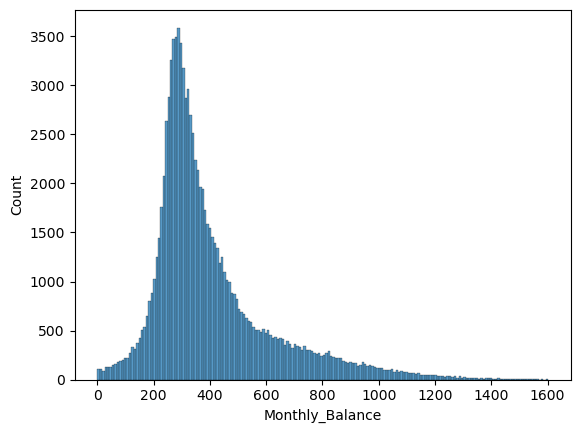

In [106]:
balance_subgroup = df_train.loc[(df_train['Monthly_Balance'] > -2000)]

fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(x=balance_subgroup["Monthly_Balance"], ax=ax)


In [107]:
balance_subgroup['Monthly_Balance'].describe()

count    98791.000000
mean       402.551258
std        213.925499
min          0.007760
25%        270.106630
50%        336.731225
75%        470.262938
max       1602.040519
Name: Monthly_Balance, dtype: float64

Okay realistically these are all positive and a reasonable max of $1602

In [108]:
# Remove outliers
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].apply(lambda balance: np.nan if balance < 0 else balance)
df_test['Monthly_Balance'] = df_test['Monthly_Balance'].apply(lambda balance: np.nan if balance < 0 else balance)

# Calculate mean without outliers
customer_balance = df_train.groupby('Customer_ID')['Monthly_Balance'].mean()

# Fill in missing data with customers mean number of delayed payments
def fill_balance(customer_ID,balance):
    return customer_balance[customer_ID] if np.isnan(balance) else balance
df_train['Monthly_Balance'] = df_train.apply(lambda x: fill_balance(x['Customer_ID'], x['Monthly_Balance']), axis=1)
df_test['Monthly_Balance'] = df_test.apply(lambda x: fill_balance(x['Customer_ID'], x['Monthly_Balance']), axis=1)

## Categorical Columns

- Occupation
- Type_of_Loan
- Credit_Mix
- Payment_of_Min_Amount
- Payment_Behaviour
- Credit_Score

### Occupation
How many occupations are there? Can we convert these to a dummy variable?

In [109]:
df_train['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

Yes we can convert to a dummy variable as there are not too many here but let's correct "_______" to first.

Originally just replaced "_______" with "Other" but later realised that the underscores were just missing information on a customer and we could extract this information and correct it properly instead. Whilst we later drop this column as it does not really effect credit score, I want to fix this as it is a bit of a challenge for me to solve.

In [110]:
occupation_subgroup = df_train.loc[(df_train['Occupation'] == '_______')]
customers_incorrect_occupation = occupation_subgroup['Customer_ID'].unique()
customers_incorrect_occupation

array(['CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0xb891', ..., 'CUS_0xb11c',
       'CUS_0xad4f', 'CUS_0x8600'], dtype=object)

In [111]:
df_train[df_train['Customer_ID'] == "CUS_0x21b1"][['Customer_ID','Occupation']]

,Customer_ID,Occupation
8,CUS_0x21b1,_______
9,CUS_0x21b1,Teacher
10,CUS_0x21b1,Teacher
11,CUS_0x21b1,Teacher
12,CUS_0x21b1,Teacher
13,CUS_0x21b1,Teacher
14,CUS_0x21b1,Teacher
15,CUS_0x21b1,Teacher


Need to then correct this person as a Teacher...

So this took a while but I am just replacing "\_\_\_\_\_\_\_" by the modal value for each customer_ID. Had to be careful because in doing this without checking I ended up with some customer_ID's having "\_\_\_\_\_\_\_" as their modal occupation despite having other values so I did some list comprehension to remove the "\_\_\_\_\_\_\_" from the modal calculation. Also tried replacing "\_\_\_\_\_\_\_" with np.nan and using the option nan_policy='omit' stats.mode but for some reason this did not work.

In [112]:
df_train['Occupation'] = df_train.groupby('Customer_ID')['Occupation'].transform(lambda x: x.replace("_______", stats.mode([y for y in x if y!="_______"], keepdims=True)[0][0])) # fill with modal value
df_test['Occupation'] = df_test.groupby('Customer_ID')['Occupation'].transform(lambda x: x.replace("_______", stats.mode([y for y in x if y!="_______"], keepdims=True)[0][0]))
df_train[df_train['Customer_ID'] == "CUS_0x21b1"][['Customer_ID','Occupation']]

/tmp/ipykernel_12553/3287444864.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  df_train['Occupation'] = df_train.groupby('Customer_ID')['Occupation'].transform(lambda x: x.replace("_______", stats.mode([y for y in x if y!="_______"], keepdims=True)[0][0])) # fill with modal value
/tmp/ipykernel_12553/3287444864.py:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  df_test['Occupation'] = df_test.groupby('Customer_ID')['Occupation'].transform(lambda x: x.replace("_______", stats.mode([y for y in x if y!="_______"], keepdims=True)[0][0]))


,Customer_ID,Occupation
8,CUS_0x21b1,Teacher
9,CUS_0x21b1,Teacher
10,CUS_0x21b1,Teacher
11,CUS_0x21b1,Teacher
12,CUS_0x21b1,Teacher
13,CUS_0x21b1,Teacher
14,CUS_0x21b1,Teacher
15,CUS_0x21b1,Teacher


In [113]:
df_train['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [114]:
df_test['Occupation'].value_counts()

Lawyer           3548
Engineer         3432
Architect        3412
Mechanic         3388
Scientist        3372
Accountant       3372
Developer        3360
Media_Manager    3360
Teacher          3336
Entrepreneur     3324
Doctor           3284
Journalist       3268
Manager          3216
Musician         3176
Writer           3152
Name: Occupation, dtype: int64

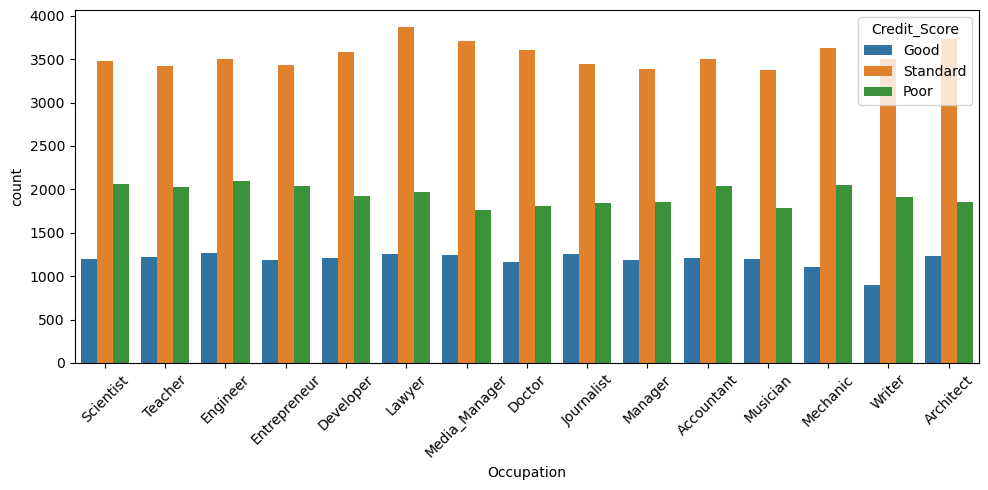

In [115]:
fig = plt.figure(figsize=(10,5))
sns.countplot(df_train, x='Occupation', hue='Credit_Score')
plt.xticks(rotation=45)
plt.tight_layout()

Generally seems as though occupation does not effect credit score so can actually drop this column. But I've worked so hard to fix the incorrect data in this column I will convert to dummy variables for now and it has the potential to be dropped instead.

In [116]:
#df_train.drop("Occupation", axis=1, inplace=True)
#df_test.drop("Occupation", axis=1, inplace=True)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Occupation'], prefix='Occupation', drop_first=True)],axis=1)
df_train.drop('Occupation', axis=1, inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Occupation'], prefix='Occupation', drop_first=True)],axis=1)
df_test.drop('Occupation', axis=1, inplace=True)

### Type_of_Loan
Lots of missing values here. Do we want to try and recover anything?

In [117]:
df_train['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

So, in theory could split this up as it appears to only be certain types of loans but also difficult as no pattern to split this up by. I guess splitting on comma's and removing the word "and" could work. Then would need to also have columns for each type of loan and fill in if a given person is using said loan. Feel like this might be a little complicated for something I don't imagine will be useful in estimating credit score...

In [118]:
df_train['Type_of_Loan'].nunique()

6260

Did not realise there were this many possibilities so let's drop this column.

In [119]:
df_train.drop('Type_of_Loan', axis=1, inplace=True)
df_test.drop('Type_of_Loan', axis=1, inplace=True)

### Credit mix
No missing values

In [120]:
df_train['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

How do these compare to the actual credit scores? I'm not entirely sure what this information is trying to tell me...

<AxesSubplot: xlabel='Credit_Mix', ylabel='count'>

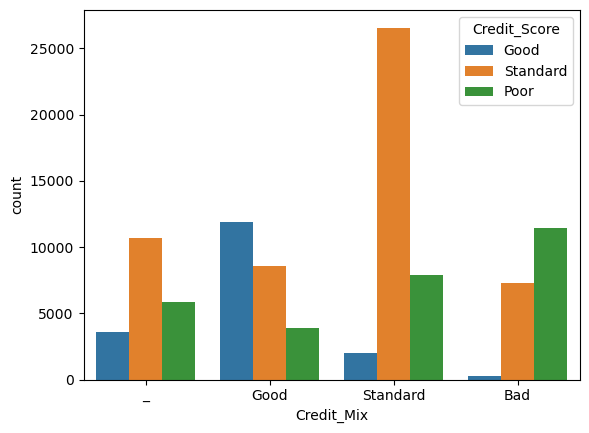

In [121]:
sns.countplot(df_train, x='Credit_Mix', hue='Credit_Score')

Generally they are correlated with their corresponding credit score. Also think this would be difficult to estimate so seeing as I have no way to estimate and I think it's highly correlated with the final credit_score lets also drop this column.

In [122]:
df_train.drop('Credit_Mix', axis=1, inplace=True)
df_test.drop('Credit_Mix', axis=1, inplace=True)

### Payment_of_Min_Amount

In [123]:
df_train['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

Boolean value except we need to work out what this NM means...Could it stand for Not Minimum? Am I just speculating this though...

In [124]:
100*(df_train['Payment_of_Min_Amount'].value_counts()/len(df_train))

Yes    52.326
No     35.667
NM     12.007
Name: Payment_of_Min_Amount, dtype: float64

Large proportion of these values are NM so can not exactly drop these rows...How does it effect credit score?

<AxesSubplot: xlabel='Payment_of_Min_Amount', ylabel='count'>

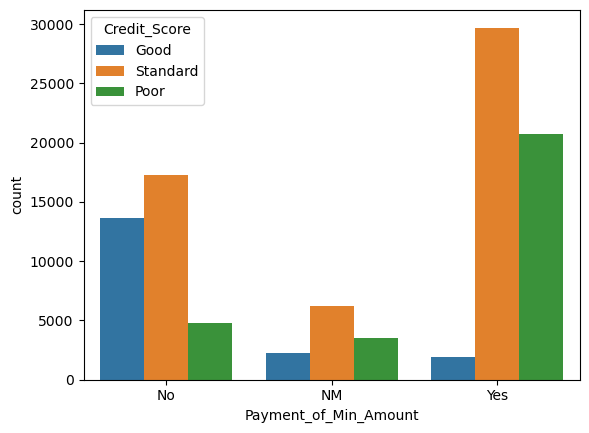

In [125]:
sns.countplot(df_train, x='Payment_of_Min_Amount', hue='Credit_Score')

Putting the discussion of NM aside, this plot does make sense. If people are just paying the minimum amount off their debt then they would have a lower credit score as they are less likely to pay back the loan and they are just increasing how much they owe back through interest accrued.

As for NM, we mostly see the "Poor" and "Standard" credit brackets. I realise for the sake of having one extra dummy variable, let's just keep this as it is and maybe we can come back and try to figure out what this means later.

In [126]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount', drop_first=True)],axis=1)
df_train.drop('Payment_of_Min_Amount', axis=1, inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount', drop_first=True)],axis=1)
df_test.drop('Payment_of_Min_Amount', axis=1, inplace=True)

### Payment Behaviour
No missing values, how many options? what can we do with this?

In [127]:
df_train['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [128]:
df_train['Payment_Behaviour'].nunique()

7

Can make dummy variables from this information. Would need to correct the false information. How much does this account for?

In [129]:
100*(df_train['Payment_Behaviour'].value_counts()/len(df_train))

Low_spent_Small_value_payments      25.513
High_spent_Medium_value_payments    17.540
Low_spent_Medium_value_payments     13.861
High_spent_Large_value_payments     13.721
High_spent_Small_value_payments     11.340
Low_spent_Large_value_payments      10.425
!@9#%8                               7.600
Name: Payment_Behaviour, dtype: float64

Too much to drop...Can we find the customers who have this and see if they are always classified as the same thing?

In [130]:
payment_behaviour_subgroup = df_train.loc[(df_train['Payment_Behaviour'] == '!@9#%8')]
payment_behaviour_subgroup['Customer_ID'].unique()


array(['CUS_0xd40', 'CUS_0x2dbc', 'CUS_0x1cdb', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

In [131]:
df_train.loc[df_train['Customer_ID'] == 'CUS_0xd40']['Payment_Behaviour']

0     High_spent_Small_value_payments
1      Low_spent_Large_value_payments
2     Low_spent_Medium_value_payments
3      Low_spent_Small_value_payments
4    High_spent_Medium_value_payments
5                              !@9#%8
6      Low_spent_Small_value_payments
7    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

Honestly seems to be no way to correct this information as it is on a month by month basis. Maybe if we looked for some correlated variable? But then I question if we need it if it is highly correlated with something else.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'High_spent_Small_value_payments'),
  Text(1, 0, 'Low_spent_Large_value_payments'),
  Text(2, 0, 'Low_spent_Medium_value_payments'),
  Text(3, 0, 'Low_spent_Small_value_payments'),
  Text(4, 0, 'High_spent_Medium_value_payments'),
  Text(5, 0, '!@9#%8'),
  Text(6, 0, 'High_spent_Large_value_payments')])

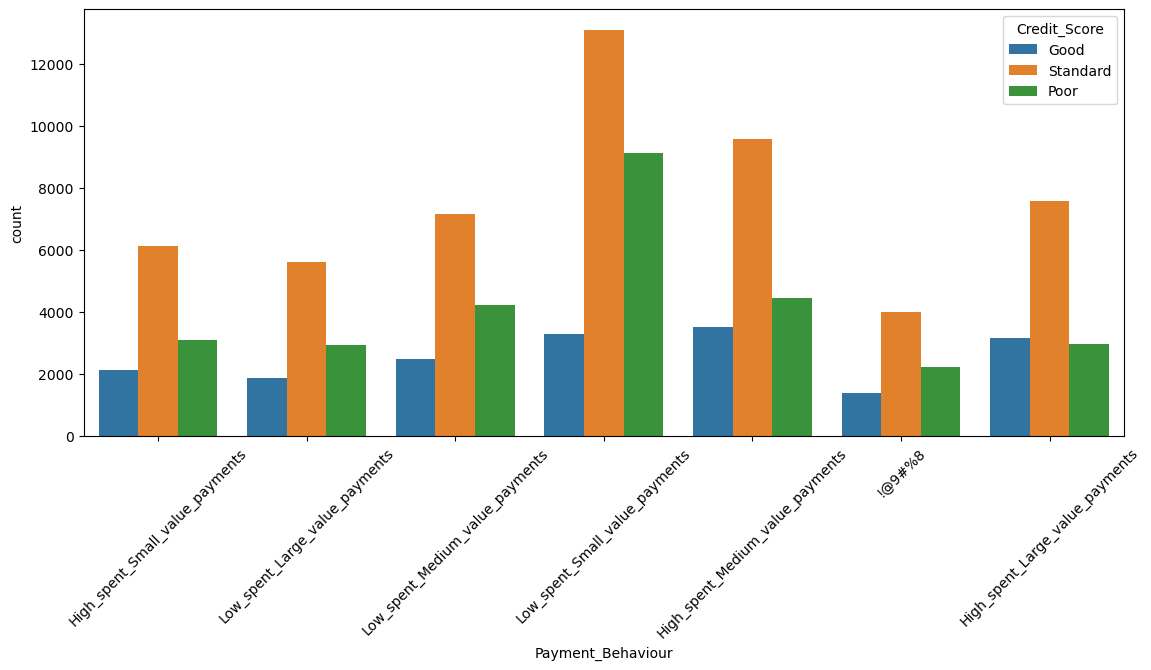

In [132]:
plt.figure(figsize=(12,5))
sns.countplot(df_train, x='Payment_Behaviour', hue='Credit_Score')
plt.tight_layout()
plt.xticks(rotation=45)

In [133]:
df_train = df_train.drop(df_train[df_train['Payment_Behaviour'] == '!@9#%8'].index)
df_test = df_test.drop(df_test[df_test['Payment_Behaviour'] == '!@9#%8'].index)

In [134]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Payment_Behaviour'], prefix='Payment_Behaviour', drop_first=True)],axis=1)
df_train.drop('Payment_Behaviour', axis=1, inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Payment_Behaviour'], prefix='Payment_Behaviour', drop_first=True)],axis=1)
df_test.drop('Payment_Behaviour', axis=1, inplace=True)

## Check everything is fine and ready for the ML model

In [135]:
df_train.columns

Index(['Customer_ID', 'Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payme

In [136]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92400 entries, 0 to 99998
Data columns (total 41 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Customer_ID                                         92400 non-null  object 
 1   Month                                               92400 non-null  int64  
 2   Age                                                 92400 non-null  float64
 3   Annual_Income                                       92400 non-null  float64
 4   Monthly_Inhand_Salary                               92400 non-null  float64
 5   Num_Bank_Accounts                                   92400 non-null  float64
 6   Num_Credit_Card                                     92400 non-null  float64
 7   Interest_Rate                                       92400 non-null  float64
 8   Num_of_Loan                                         92400 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46200 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Customer_ID                                         46200 non-null  object 
 1   Month                                               46200 non-null  int64  
 2   Age                                                 46200 non-null  float64
 3   Annual_Income                                       46200 non-null  float64
 4   Monthly_Inhand_Salary                               46200 non-null  float64
 5   Num_Bank_Accounts                                   46200 non-null  float64
 6   Num_Credit_Card                                     46200 non-null  float64
 7   Interest_Rate                                       46200 non-null  float64
 8   Num_of_Loan                                         46200 non-null  float64


None

Just credit score and customer_ID are not numbers. We will be dropping customer_ID and I need to research how to handle training a Neural Network when there are 3 categories as I have only dealt with 2 in the past.

In [137]:
df_train.drop('Customer_ID', axis=1, inplace=True)
df_test.drop('Customer_ID', axis=1, inplace=True)

In [138]:
display(df_train.isnull().sum().apply(lambda x: 100*(x/len(df_train))))
display(df_test.isnull().sum().apply(lambda x: 100*(x/len(df_test))))

Month                                                 0.0
Age                                                   0.0
Annual_Income                                         0.0
Monthly_Inhand_Salary                                 0.0
Num_Bank_Accounts                                     0.0
Num_Credit_Card                                       0.0
Interest_Rate                                         0.0
Num_of_Loan                                           0.0
Delay_from_due_date                                   0.0
Num_of_Delayed_Payment                                0.0
Changed_Credit_Limit                                  0.0
Num_Credit_Inquiries                                  0.0
Outstanding_Debt                                      0.0
Credit_Utilization_Ratio                              0.0
Credit_History_Age                                    0.0
Total_EMI_per_month                                   0.0
Amount_invested_monthly                               0.0
Monthly_Balanc

Month                                                 0.000000
Age                                                   0.000000
Annual_Income                                         0.000000
Monthly_Inhand_Salary                                 0.000000
Num_Bank_Accounts                                     0.000000
Num_Credit_Card                                       0.000000
Interest_Rate                                         0.000000
Num_of_Loan                                           0.000000
Delay_from_due_date                                   0.000000
Num_of_Delayed_Payment                                0.000000
Changed_Credit_Limit                                  0.000000
Num_Credit_Inquiries                                  0.000000
Outstanding_Debt                                      0.000000
Credit_Utilization_Ratio                              0.000000
Credit_History_Age                                    0.008658
Total_EMI_per_month                                   0

for some reason I have missing data in credit_history_age for the test data so let's just drop these few rows.

In [139]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

# Correlation

<AxesSubplot: >

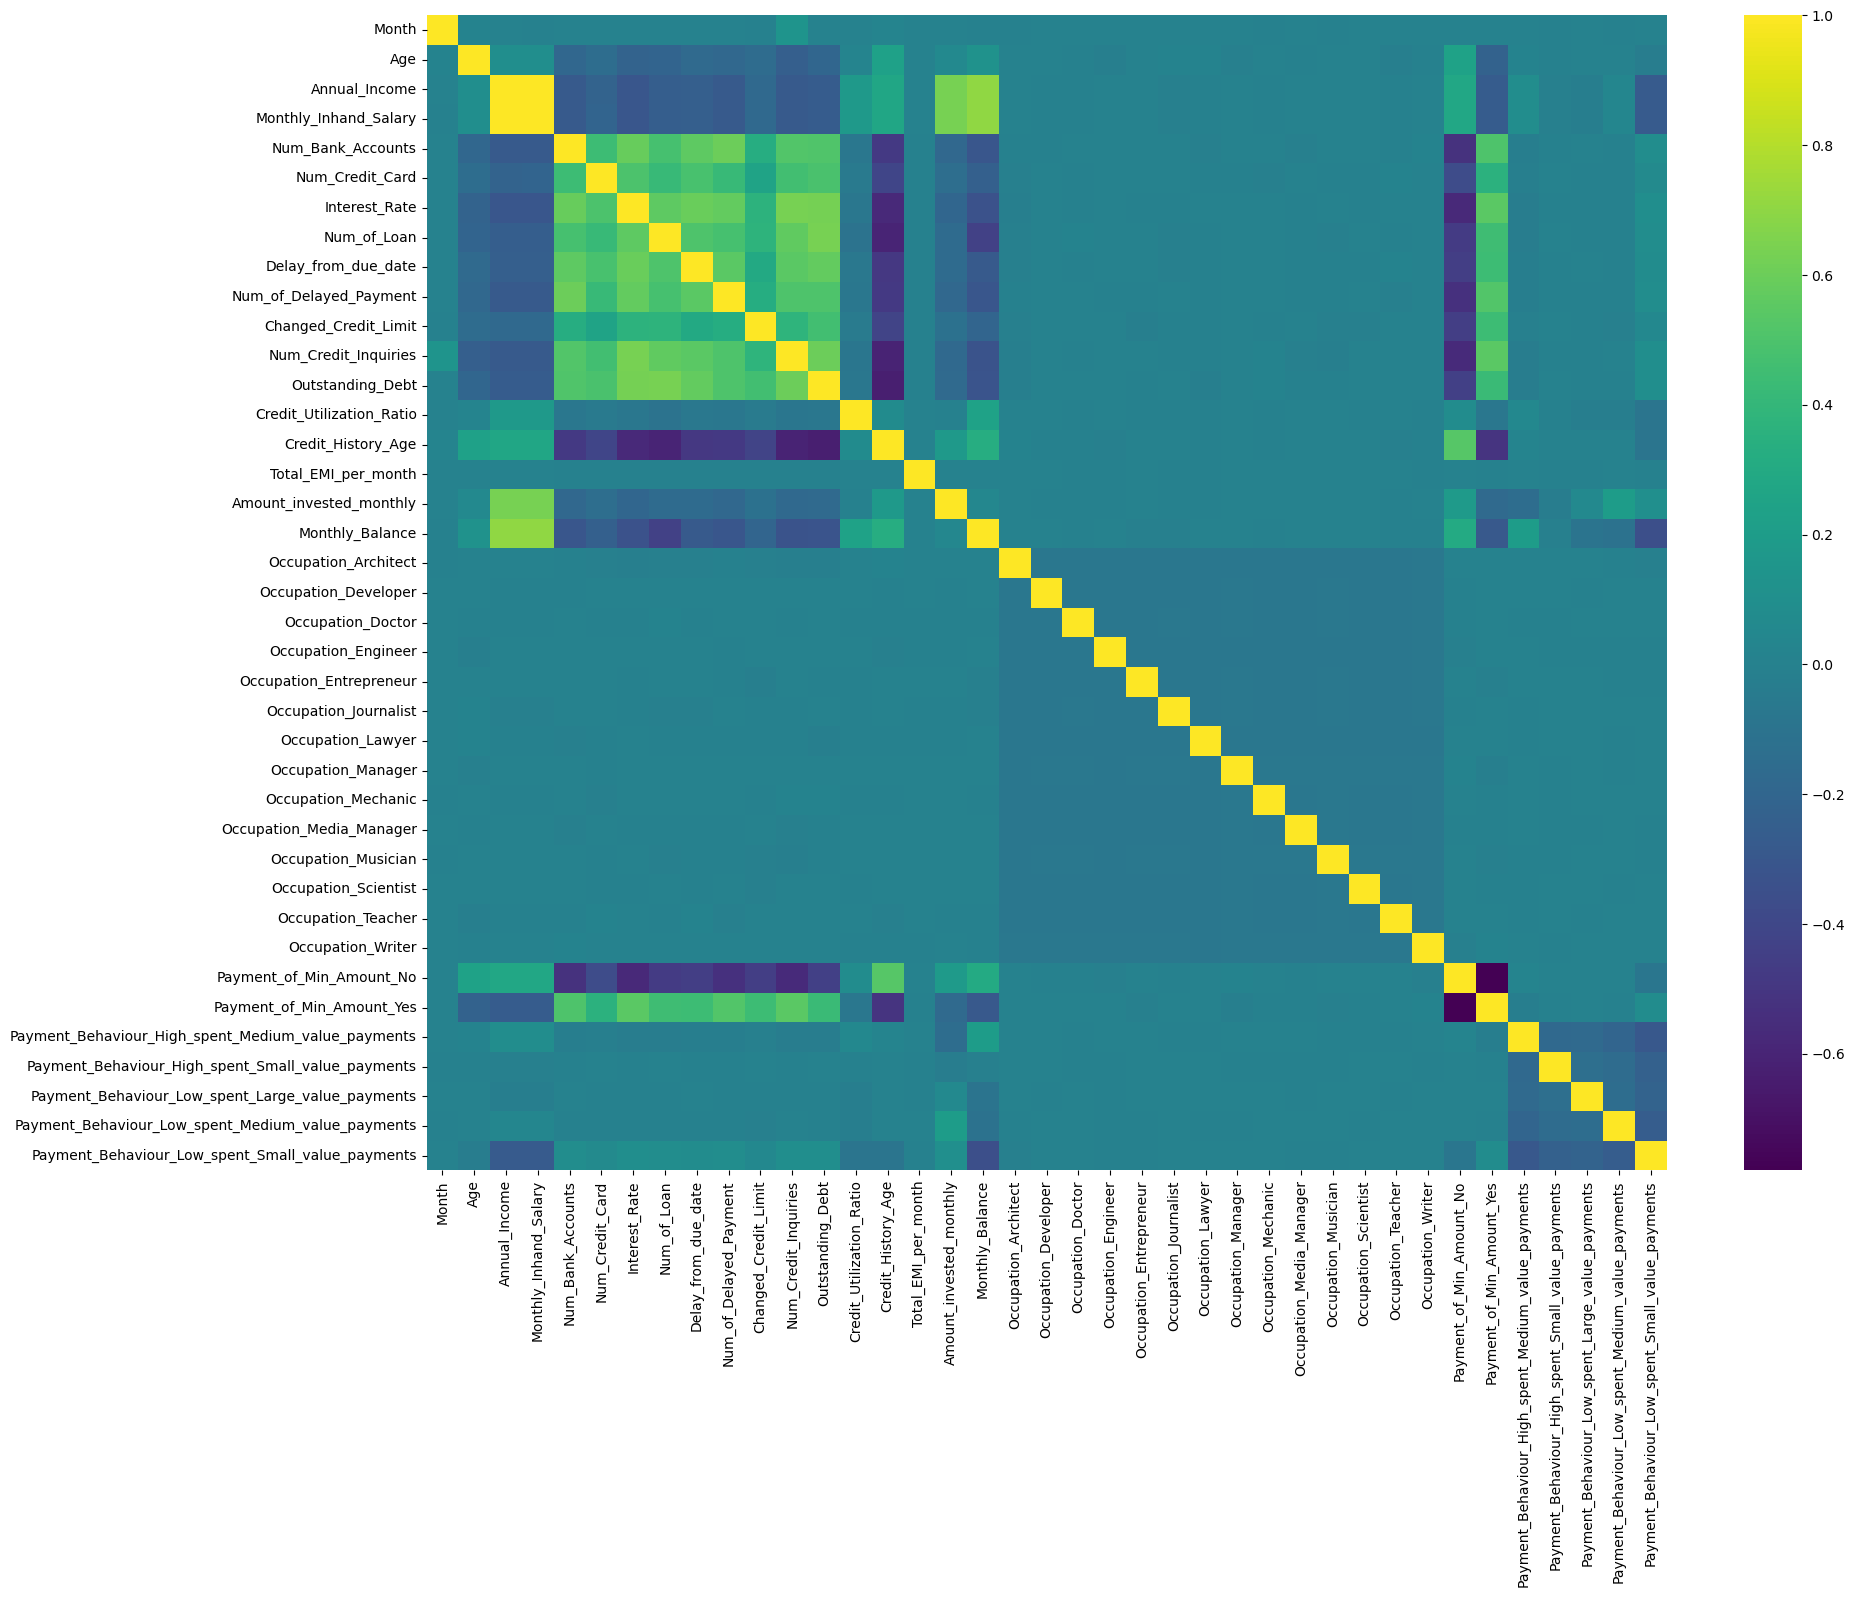

In [143]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), cmap='viridis')

Monthly_inhand_salary and Annual_Income are perfectly correlated. This makes sense, I should drop one column as it is repeated information.

Looking back, Monthly_inhand_salary had 15% missing data that we approximated with each customers mean. Annual_Income had no missing data although did have 999 values that were unfeasibly large that we corrected. 999 out of a sample of 100k is very small and so we will keep the Annual_Income column and remove the Monthly_inhand_salary.

In [144]:
df_train.drop('Monthly_Inhand_Salary', axis=1, inplace=True)
df_test.drop('Monthly_Inhand_Salary', axis=1, inplace=True)

We also note the negative correlation between Payment_of_Min_Amount_No and Payment_of_Min_Amount_Yes. Looking back at why we have both as dummy variables, we had a third option called "NM" that I did not know how to handle at first so I just left this in. This means that while they are highly negatively correlated it is not perfect and I shall leave it as it is for now. I might come back and fix the "NM" option so that I have only "Yes" and "No" as options for this "Payment_of_Min_Amount" and then I will only have one dummy variable for this category as the other can safely be removed.

## What about good and bad credit?

In [146]:
df_train['good_credit'] = df_train['Credit_Score'].map({'Good':1,'Standard':0, 'Poor': 0})
df_train['poor_credit'] = df_train['Credit_Score'].map({'Good':0,'Standard':0, 'Poor': 1})

<AxesSubplot: >

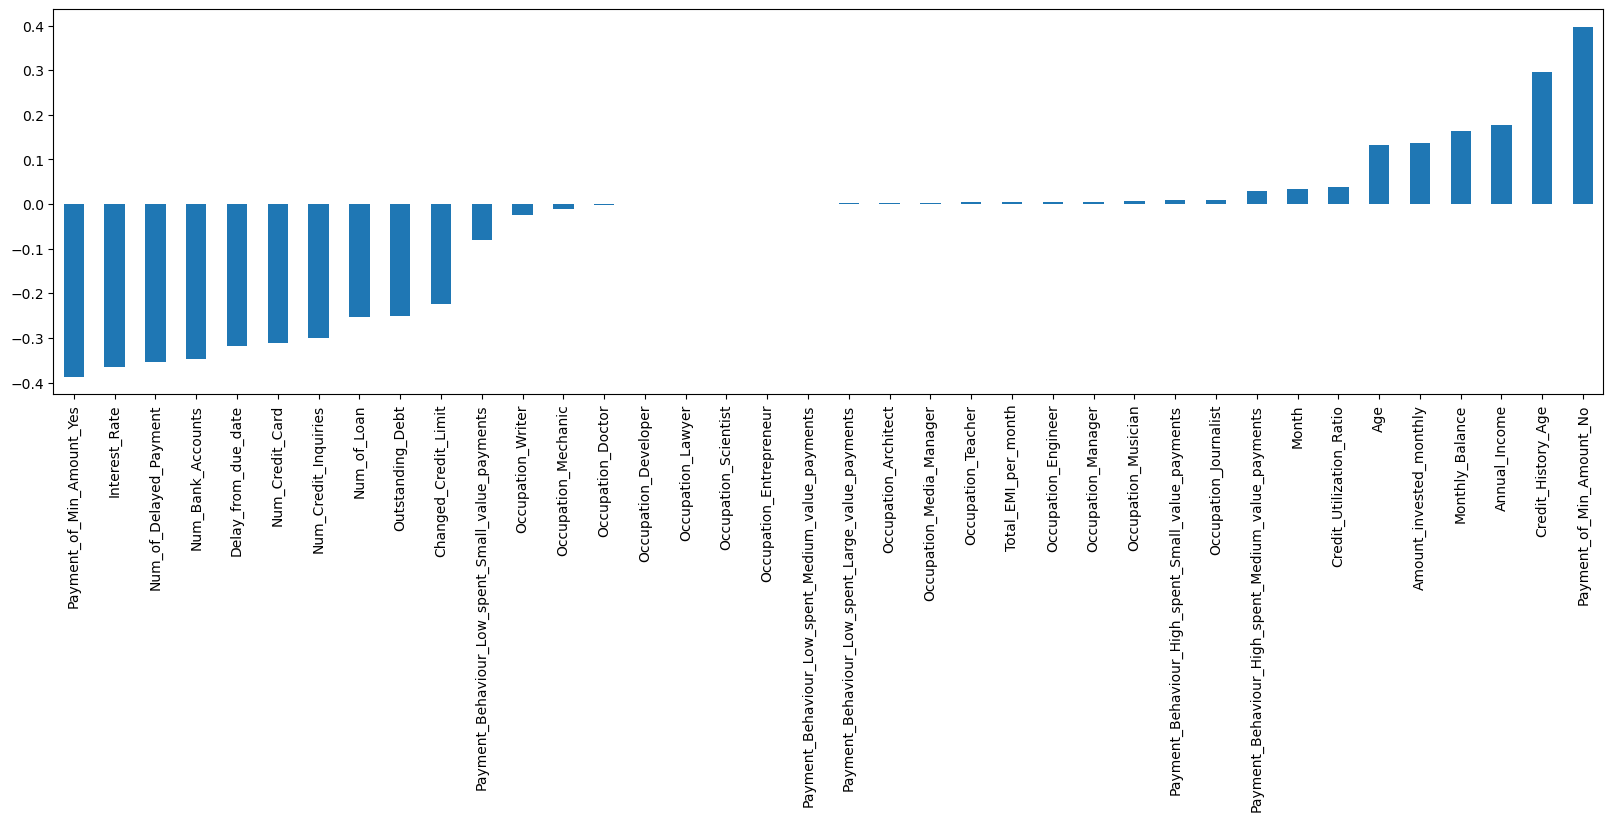

In [149]:
plt.figure(figsize=(20, 5))
df_train.corr()['good_credit'][:-2].sort_values().plot(kind='bar')

We see that the biggest indicator of good credit is not paying the minimum amount. Other factors that are of use are a long Credit_History_Age, high Annual_Income, high Monthly_Balance, investing lots monthly and a persons age. I suspect a persons age is actually correlated with their Credit_History_Age so I'll go back and recheck that out. It is reasonably correlated but not perfect so we will keep this information.

<AxesSubplot: >

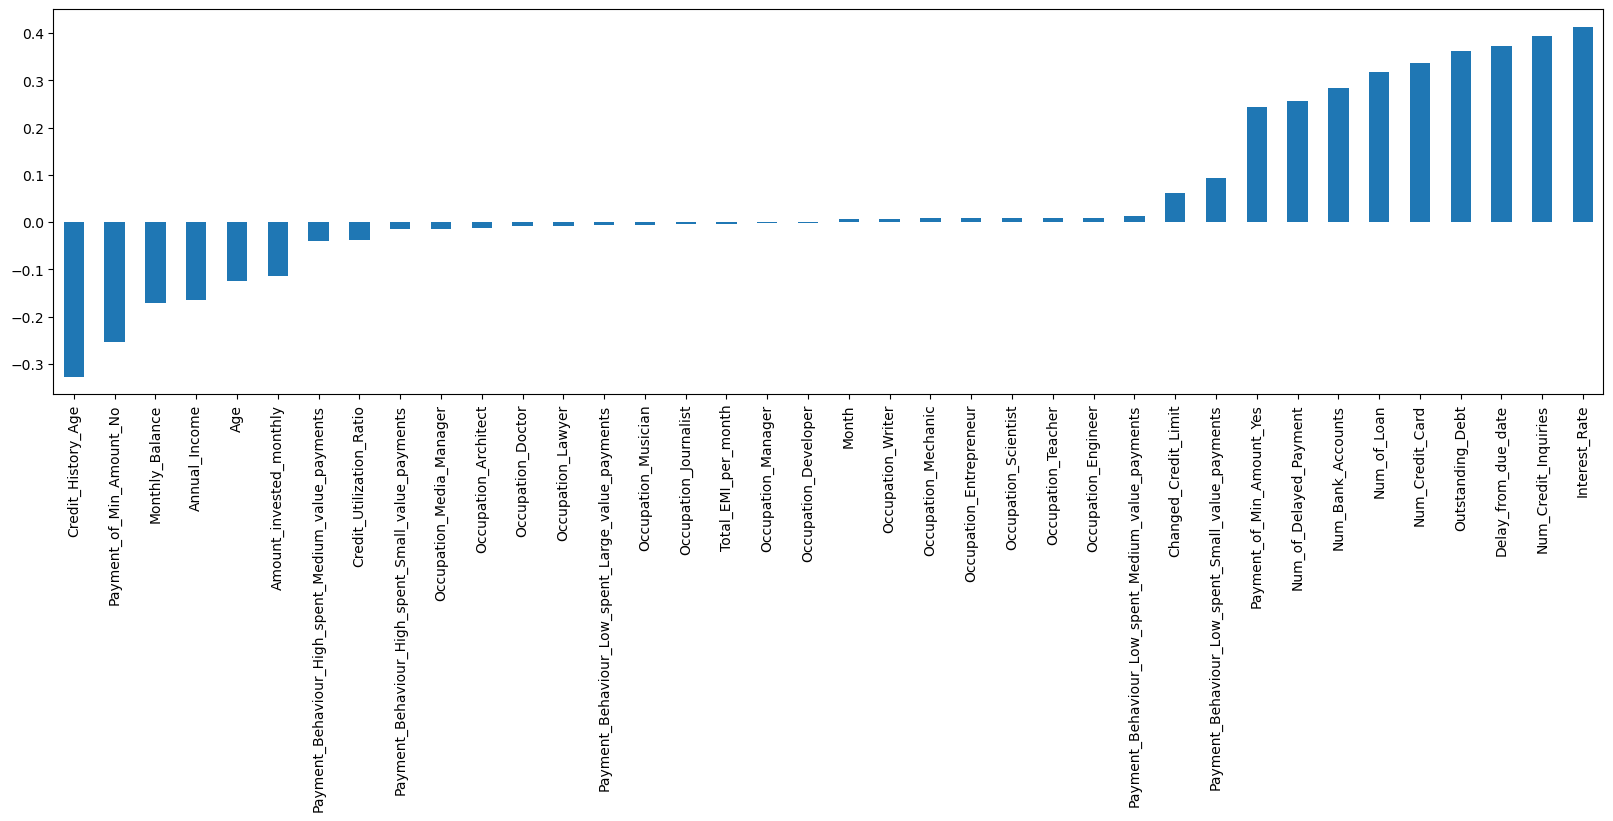

In [150]:
plt.figure(figsize=(20, 5))
df_train.corr()['poor_credit'][:-2].sort_values().plot(kind='bar')

Let's drop these columns we made to make this plot

In [151]:
df_train.drop(['good_credit', 'poor_credit'], axis=1, inplace=True)